# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
from urllib.request import urlretrieve
import os
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm
from zipfile import ZipFile
import math

def download(url, file):
    if not os.path.isfile(file):
        print("Download file... " + file + " ...")
        urlretrieve(url,file)
        print("File downloaded")

download('https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip','data.zip')
print("All the files are downloaded")

All the files are downloaded


In [2]:
def uncompress_features_labels(dir):
    if(os.path.isdir('data')):
        print('Data extracted')
    else:
        with ZipFile(dir) as zipf:
            zipf.extractall('data')
uncompress_features_labels('data.zip')

def data_Files(mypath):
    onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
    print(onlyfiles)

data_Files('data')

Data extracted
['train.p', 'model.ckpt.index', 'valid.p', 'model.ckpt.data-00000-of-00001', 'model.ckpt.meta', 'checkpoint', 'test.p']


In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print('Data Loaded Successfully')

Data Loaded Successfully


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


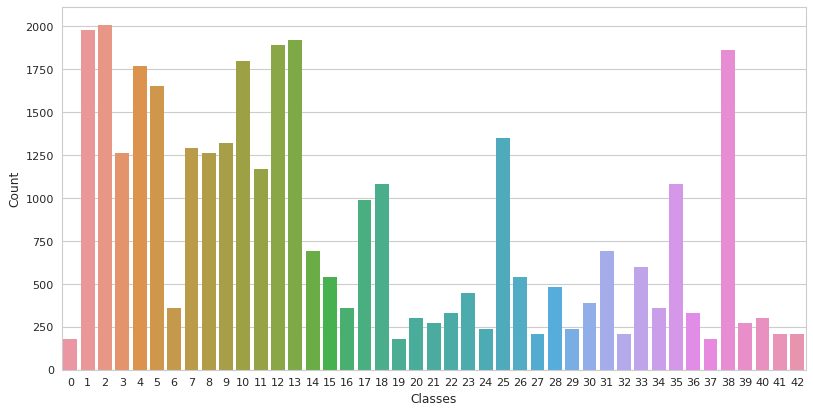

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.set_style("whitegrid")
ax = sns.countplot(y_train)
ax.set(xlabel = "Classes", ylabel = "Count")

<p>We can see that data is not properly distributed across classes.</p>

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


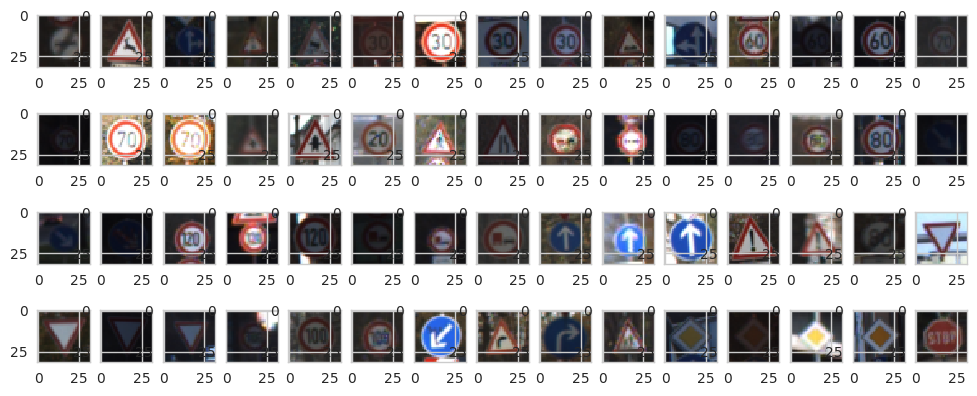

In [6]:
#Let's see the images for some signs
fig=plt.figure(figsize=(12, 5),dpi=100)
columns = 15
rows = 4
img = 0
for i in np.arange(0,30000,500):
    img = img+1
    fig.add_subplot(rows, columns, img)
    plt.imshow(X_train[i])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def zeroCenterData(x):
    return (x/255)
#X_train = zeroCenterData(X_train)
#X_test = zeroCenterData(X_test)
#X_valid = zeroCenterData(X_valid)

encoder = LabelBinarizer()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)
y_valid = encoder.transform(y_valid)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
y_valid = y_valid.astype(np.float32)

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state = 10)

print("Preprocessing Done")

Preprocessing Done


### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [9]:
def conv_2d(x, W, b, stride=1):
    conv = tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding = 'SAME')
    conv = tf.nn.bias_add(conv, b)
    return tf.nn.relu(conv)

def max_pool(x, k=2):
    return tf.nn.max_pool(x, ksize = [1, k, k, 1], strides=[1, k, k, 1], padding = 'SAME')

def dropout(x, keep_prob=.8):
    return tf.nn.dropout(x, keep_prob = keep_prob)

def fc_l(x, W, b):
    fc = tf.add(tf.matmul(x, W), b)
    return tf.nn.relu(fc)

def next_batch(x, batch_size, n):
    start_point = n*batch_size
    end_point = start_point + batch_size
    return x[start_point: end_point]
#next_batch(X_train, 100, 0)
print("Utility Functions Created")

Utility Functions Created


In [10]:
def convnet_deep(x, conv_layer1 = 8, conv_layer2 = 16, conv_layer3 = 32, conv_layer4 = 32, keep_prob = 0.8, keep_prob_fl=0.5):    
    mu = 0
    sigma = 0.1
    
    W_Conv1 = tf.Variable(tf.truncated_normal((3, 3, 3, conv_layer1), mu, sigma))
    B_Conv1 = tf.Variable(tf.zeros(conv_layer1,1))
    Conv1 = tf.nn.conv2d(x, W_Conv1, [1,1,1,1],'VALID') + B_Conv1
    Conv1 = tf.nn.relu(Conv1, name = 'Conv1')
    
    # Input = 30x30. Output = 28x28.
    W_Conv2 = tf.Variable(tf.truncated_normal((3, 3, conv_layer1, conv_layer2), mu, sigma))
    B_Conv2 = tf.Variable(tf.zeros(conv_layer2,1))
    Conv2 = tf.nn.conv2d(Conv1, W_Conv2, [1,1,1,1], 'VALID') + B_Conv2
    Conv2 = tf.nn.relu(Conv2, name = 'Conv2')
    
    # Input = 28x28. Output = 14x14xN
    Pooling1 = tf.nn.max_pool(Conv2, [1,2,2,1], [1,2,2,1], 'VALID')
    
    DROP1 = tf.nn.dropout(Pooling1, keep_prob = keep_prob)
    
    # Input = 14x14xN. Output = 12x12xN.
    W_Conv3 = tf.Variable(tf.truncated_normal((3, 3, conv_layer2, conv_layer3), mu, sigma))
    B_Conv3 = tf.Variable(tf.zeros(conv_layer3, 1))
    Conv3 = tf.nn.conv2d(DROP1, W_Conv3, [1,1,1,1], 'VALID') + B_Conv3
    Conv3 = tf.nn.relu(Conv3, name = 'Conv3')
    
    # Input = 12x12 Output = 10x10
    W_Conv4 = tf.Variable(tf.truncated_normal((3, 3, conv_layer3, conv_layer4), mu, sigma))
    B_Conv4 = tf.Variable(tf.zeros(conv_layer4,1))
    Conv4 = tf.nn.conv2d(Conv3, W_Conv4, [1,1,1,1], 'VALID') + B_Conv4
    Conv4 = tf.nn.relu(Conv4, name = 'Conv4')
    
    #Input = 10x10xN. Output = 5x5xN
    Pooling2 = tf.nn.max_pool(Conv4,[1,2,2,1],[1,2,2,1],'VALID')
    
    # Input = 5x5. Output = 3x3
    W_Conv5 = tf.Variable(tf.truncated_normal((3, 3, conv_layer4, conv_layer4), mu, sigma))
    B_Conv5 = tf.Variable(tf.zeros(conv_layer4, 1))
    Conv5 = tf.nn.conv2d(Pooling2, W_Conv5, [1,1,1,1], 'VALID') + B_Conv5
    
    Conv5 = tf.nn.relu(Conv5, name = 'Conv5')
    
    # Flatten. Input = 4x4x16. Output = 400.
    FL = tf.contrib.layers.flatten(Conv5,[1,3*3*conv_layer4])
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    
    W_FC1=tf.Variable(tf.truncated_normal((3*3*conv_layer4,120),mu,sigma))
    B_FC1=tf.Variable(tf.zeros(120,1))
    FC1 = (tf.matmul(FL,W_FC1)+B_FC1)
    
    AC4 = tf.nn.relu(FC1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    DROP3 = tf.nn.dropout(AC4, keep_prob = keep_prob_fl)
    
    W_FC2 = tf.Variable(tf.truncated_normal((120,84), mu, sigma))
    B_FC2 = tf.Variable(tf.zeros(84,1))
    FC2 = (tf.matmul(DROP3,W_FC2) + B_FC2)
    
    # Activation.
    AC5 = tf.nn.relu(FC2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    W_FC3 = tf.Variable(tf.truncated_normal((84,43), mu, sigma))
    B_FC3 = tf.Variable(tf.zeros(43,1))
    FC3 = (tf.matmul(AC5,W_FC3) + B_FC3)

    logits = FC3
    return logits

print("Model created.")

Model created.


In [11]:
x = tf.placeholder(tf.float32,[None, image_shape[0], image_shape[1], image_shape[2]])
y = tf.placeholder(tf.float32, [None, n_classes])
l_r = 0.0005
keep_prob = tf.placeholder(tf.float32)
keep_prob_fl = tf.placeholder(tf.float32)
#logits = conv_model2(x, weigths, biases, 1, keep_prob)
logits = convnet_deep(x)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate = l_r).minimize(cost)

correct_pred = tf.equal(tf.argmax(logits,1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()


batch_size = 128

validation_accuracy = 0.0
saver = tf.train.Saver()
validation_all = []
loss_all = []
epochs = 60
train_acc = 0
train_all = []

.### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Epoch  2/60:   1%|▏         | 4/272 [00:00<00:07, 36.79batches/s]

Epoch  1, Batch 272 -  Validation Accuracy: 0.192971


Epoch  3/60:   1%|▏         | 4/272 [00:00<00:07, 37.67batches/s]

Epoch  2, Batch 272 -  Validation Accuracy: 0.471202


Epoch  4/60:   1%|▏         | 4/272 [00:00<00:07, 37.80batches/s]

Epoch  3, Batch 272 -  Validation Accuracy: 0.659864


Epoch  5/60:   1%|▏         | 4/272 [00:00<00:07, 37.77batches/s]

Epoch  4, Batch 272 -  Validation Accuracy: 0.740816


Epoch  6/60:   1%|▏         | 4/272 [00:00<00:07, 37.85batches/s]

Epoch  5, Batch 272 -  Validation Accuracy: 0.800680


Epoch  7/60:   1%|▏         | 4/272 [00:00<00:07, 37.69batches/s]

Epoch  6, Batch 272 -  Validation Accuracy: 0.834241


Epoch  8/60:   1%|▏         | 4/272 [00:00<00:07, 37.84batches/s]

Epoch  7, Batch 272 -  Validation Accuracy: 0.857370


Epoch  9/60:   1%|▏         | 4/272 [00:00<00:07, 37.96batches/s]

Epoch  8, Batch 272 -  Validation Accuracy: 0.860318


Epoch 10/60:   1%|▏         | 4/272 [00:00<00:07, 37.74batches/s]

Epoch  9, Batch 272 -  Validation Accuracy: 0.877551


Epoch 11/60:   1%|▏         | 4/272 [00:00<00:07, 37.63batches/s]

Epoch 10, Batch 272 -  Validation Accuracy: 0.890703


Epoch 12/60:   1%|▏         | 4/272 [00:00<00:07, 37.83batches/s]

Epoch 11, Batch 272 -  Validation Accuracy: 0.898413


Epoch 13/60:   1%|▏         | 4/272 [00:00<00:07, 37.51batches/s]

Epoch 12, Batch 272 -  Validation Accuracy: 0.901134


Epoch 14/60:   1%|▏         | 4/272 [00:00<00:07, 37.47batches/s]

Epoch 13, Batch 272 -  Validation Accuracy: 0.912925


Epoch 15/60:   1%|▏         | 4/272 [00:00<00:07, 37.64batches/s]

Epoch 14, Batch 272 -  Validation Accuracy: 0.909524


Epoch 16/60:   1%|▏         | 4/272 [00:00<00:07, 37.52batches/s]

Epoch 15, Batch 272 -  Validation Accuracy: 0.917007


Epoch 17/60:   1%|▏         | 4/272 [00:00<00:07, 37.78batches/s]

Epoch 16, Batch 272 -  Validation Accuracy: 0.916553


Epoch 18/60:   1%|▏         | 4/272 [00:00<00:07, 37.74batches/s]

Epoch 17, Batch 272 -  Validation Accuracy: 0.923810


Epoch 19/60:   1%|▏         | 4/272 [00:00<00:07, 37.65batches/s]

Epoch 18, Batch 272 -  Validation Accuracy: 0.924036


Epoch 20/60:   1%|▏         | 4/272 [00:00<00:07, 37.69batches/s]

Epoch 19, Batch 272 -  Validation Accuracy: 0.930159


Epoch 21/60:   1%|▏         | 4/272 [00:00<00:07, 37.72batches/s]

Epoch 20, Batch 272 -  Validation Accuracy: 0.926531


Epoch 22/60:   1%|▏         | 4/272 [00:00<00:07, 38.02batches/s]

Epoch 21, Batch 272 -  Validation Accuracy: 0.930839


Epoch 23/60:   1%|▏         | 4/272 [00:00<00:07, 37.87batches/s]

Epoch 22, Batch 272 -  Validation Accuracy: 0.936508


Epoch 24/60:   1%|▏         | 4/272 [00:00<00:07, 37.81batches/s]

Epoch 23, Batch 272 -  Validation Accuracy: 0.940817


Epoch 25/60:   1%|▏         | 4/272 [00:00<00:07, 37.99batches/s]

Epoch 24, Batch 272 -  Validation Accuracy: 0.941950


Epoch 26/60:   1%|▏         | 4/272 [00:00<00:07, 37.95batches/s]

Epoch 25, Batch 272 -  Validation Accuracy: 0.935601


Epoch 27/60:   1%|▏         | 4/272 [00:00<00:07, 37.87batches/s]

Epoch 26, Batch 272 -  Validation Accuracy: 0.943311


Epoch 28/60:   1%|▏         | 4/272 [00:00<00:07, 37.63batches/s]

Epoch 27, Batch 272 -  Validation Accuracy: 0.938549


Epoch 29/60:   1%|▏         | 4/272 [00:00<00:07, 37.65batches/s]

Epoch 28, Batch 272 -  Validation Accuracy: 0.941950


Epoch 30/60:   1%|▏         | 4/272 [00:00<00:07, 37.60batches/s]

Epoch 29, Batch 272 -  Validation Accuracy: 0.943764


Epoch 31/60:   1%|▏         | 4/272 [00:00<00:07, 37.95batches/s]

Epoch 30, Batch 272 -  Validation Accuracy: 0.947619


Epoch 32/60:   1%|▏         | 4/272 [00:00<00:07, 37.77batches/s]

Epoch 31, Batch 272 -  Validation Accuracy: 0.940136


Epoch 33/60:   1%|▏         | 4/272 [00:00<00:07, 38.06batches/s]

Epoch 32, Batch 272 -  Validation Accuracy: 0.939683


Epoch 34/60:   1%|▏         | 4/272 [00:00<00:07, 37.66batches/s]

Epoch 33, Batch 272 -  Validation Accuracy: 0.945579


Epoch 35/60:   1%|▏         | 4/272 [00:00<00:07, 37.95batches/s]

Epoch 34, Batch 272 -  Validation Accuracy: 0.942857


Epoch 36/60:   1%|▏         | 4/272 [00:00<00:07, 37.76batches/s]

Epoch 35, Batch 272 -  Validation Accuracy: 0.953742


Epoch 37/60:   1%|▏         | 4/272 [00:00<00:07, 37.93batches/s]

Epoch 36, Batch 272 -  Validation Accuracy: 0.956690


Epoch 38/60:   1%|▏         | 4/272 [00:00<00:07, 37.79batches/s]

Epoch 37, Batch 272 -  Validation Accuracy: 0.949660


Epoch 39/60:   1%|▏         | 4/272 [00:00<00:07, 37.79batches/s]

Epoch 38, Batch 272 -  Validation Accuracy: 0.950567


Epoch 40/60:   1%|▏         | 4/272 [00:00<00:07, 37.96batches/s]

Epoch 39, Batch 272 -  Validation Accuracy: 0.950340


Epoch 41/60:   1%|▏         | 4/272 [00:00<00:07, 37.84batches/s]

Epoch 40, Batch 272 -  Validation Accuracy: 0.954422


Epoch 42/60:   1%|▏         | 4/272 [00:00<00:07, 37.76batches/s]

Epoch 41, Batch 272 -  Validation Accuracy: 0.953742


Epoch 43/60:   1%|▏         | 4/272 [00:00<00:07, 37.67batches/s]

Epoch 42, Batch 272 -  Validation Accuracy: 0.954195


Epoch 44/60:   1%|▏         | 4/272 [00:00<00:07, 37.81batches/s]

Epoch 43, Batch 272 -  Validation Accuracy: 0.943084


Epoch 45/60:   1%|▏         | 4/272 [00:00<00:07, 37.76batches/s]

Epoch 44, Batch 272 -  Validation Accuracy: 0.954422


Epoch 46/60:   1%|▏         | 4/272 [00:00<00:07, 37.81batches/s]

Epoch 45, Batch 272 -  Validation Accuracy: 0.948753


Epoch 47/60:   1%|▏         | 4/272 [00:00<00:07, 38.21batches/s]

Epoch 46, Batch 272 -  Validation Accuracy: 0.951247


Epoch 48/60:   1%|▏         | 4/272 [00:00<00:07, 38.10batches/s]

Epoch 47, Batch 272 -  Validation Accuracy: 0.956009


Epoch 49/60:   1%|▏         | 4/272 [00:00<00:07, 37.74batches/s]

Epoch 48, Batch 272 -  Validation Accuracy: 0.957370


Epoch 50/60:   1%|▏         | 4/272 [00:00<00:07, 37.14batches/s]

Epoch 49, Batch 272 -  Validation Accuracy: 0.952835


Epoch 51/60:   1%|▏         | 4/272 [00:00<00:07, 37.59batches/s]

Epoch 50, Batch 272 -  Validation Accuracy: 0.947393


Epoch 52/60:   1%|▏         | 4/272 [00:00<00:07, 37.69batches/s]

Epoch 51, Batch 272 -  Validation Accuracy: 0.960544


Epoch 53/60:   1%|▏         | 4/272 [00:00<00:07, 37.82batches/s]

Epoch 52, Batch 272 -  Validation Accuracy: 0.958957


Epoch 54/60:   1%|▏         | 4/272 [00:00<00:07, 37.99batches/s]

Epoch 53, Batch 272 -  Validation Accuracy: 0.960998


Epoch 55/60:   1%|▏         | 4/272 [00:00<00:07, 37.98batches/s]

Epoch 54, Batch 272 -  Validation Accuracy: 0.955783


Epoch 56/60:   1%|▏         | 4/272 [00:00<00:07, 37.88batches/s]

Epoch 55, Batch 272 -  Validation Accuracy: 0.959864


Epoch 57/60:   1%|▏         | 4/272 [00:00<00:07, 38.00batches/s]

Epoch 56, Batch 272 -  Validation Accuracy: 0.955556


Epoch 58/60:   1%|▏         | 4/272 [00:00<00:07, 37.84batches/s]

Epoch 57, Batch 272 -  Validation Accuracy: 0.956916


Epoch 59/60:   1%|▏         | 4/272 [00:00<00:07, 37.94batches/s]

Epoch 58, Batch 272 -  Validation Accuracy: 0.958050


Epoch 60/60:   1%|▏         | 4/272 [00:00<00:07, 37.80batches/s]

Epoch 59, Batch 272 -  Validation Accuracy: 0.957823


Epoch 60/60: 100%|██████████| 272/272 [00:07<00:00, 37.95batches/s]


Epoch 60, Batch 272 -  Validation Accuracy: 0.959411
Training Accuracy is  0.997948487143
Model saved in path %s data/model.ckpt


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


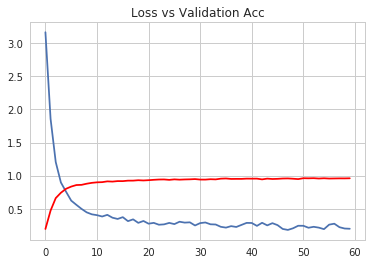

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:    
    sess.run(init)
    batch_count = int(math.ceil((n_train)/batch_size))
    for epoch in range(epochs):
        
        batches_pbar = tqdm(range(batch_count), desc = "Epoch {:>2}/{}".format(epoch+1, epochs),unit='batches')
        
        for batch in batches_pbar:
            batch_x = next_batch(X_train, batch_size, batch)
            batch_y = next_batch(y_train, batch_size, batch)
            sess.run(optimizer, feed_dict = {x: batch_x, y:batch_y, keep_prob: .5})
            train_acc = (train_acc + sess.run(accuracy, feed_dict ={x: batch_x, y: batch_y, keep_prob: 1.0}))/2
            
        loss = sess.run(cost, feed_dict = {x:X_valid, y:y_valid, keep_prob: 1.0})
        valid_acc = sess.run(accuracy, feed_dict ={x: X_valid, y: y_valid, keep_prob: 1.0})    
        train_all.append(train_acc)
        validation_all.append(valid_acc)
        loss_all.append(loss)
        print('Epoch {:>2}, Batch {:>3} -  Validation Accuracy: {:.6f}'.format(epoch + 1, batch + 1, valid_acc))
        
    print("Training Accuracy is ", train_acc)
    saved = saver.save(sess, 'data/model.ckpt')
    print("Model saved in path %s", saved)
    
    plt.title('Loss vs Validation Acc')
    plt.plot(np.arange(epochs), loss_all)
    plt.plot(np.arange(epochs), validation_all, color='red')

    plt.show()

In [13]:
import tensorflow as tf
test_accuracy_saved_model1 = tf.placeholder(tf.float32)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./data'))
    test_acc = sess.run(accuracy, feed_dict = {x: X_test, y: y_test, keep_prob:1.0,keep_prob_fl:1.0})
    print('Test accuracy is ', test_acc)

Test accuracy is  0.934917


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


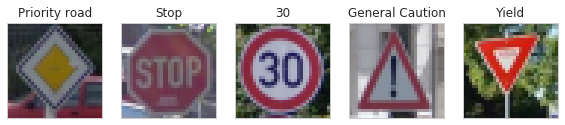

In [14]:
import cv2
img_url = [
            'Test_Images/priority.jpg',
            'Test_Images/stop.jpg',
            'Test_Images/30.jpg',
            'Test_Images/general_caution.jpg',
            'Test_Images/yield.jpg',
#           'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Zeichen_114_-_Schleuder-_oder_Rutschgefahr%2C_StVO_2013.svg/120px-Zeichen_114_-_Schleuder-_oder_Rutschgefahr%2C_StVO_2013.svg.png',
#           'https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Zeichen_215_-_Kreisverkehr%2C_StVO_2000.svg/120px-Zeichen_215_-_Kreisverkehr%2C_StVO_2000.svg.png',
#           'https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Zeichen_274-60_-_Zul%C3%A4ssige_H%C3%B6chstgeschwindigkeit%2C_StVO_2017.svg/170px-Zeichen_274-60_-_Zul%C3%A4ssige_H%C3%B6chstgeschwindigkeit%2C_StVO_2017.svg.png',
#           'https://raw.githubusercontent.com/harveenchadha/Udacity-CarND-Traffic-Sign-Classifier/master/traffic-signs-real/new/aheadonly35.jpg'
          ]

img_class_names = ['Priority road','Stop', '30', 'General Caution', 'Yield']
img_class = [12, 14, 1, 18, 13]
img_data = []
dim = (32, 32)
fig = plt.figure(figsize = (16,16))
i = 0
for img in img_url:
    img = plt.imread(img)
    img = img[:,:,:3]
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    axis = fig.add_subplot(1, 8, i + 1, xticks = [], yticks = [], title=img_class_names[i])
    plt.imshow(resized)
    img_data.append(resized)
    i = i+1

### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer

test_accuracy_saved_model1 = tf.placeholder(tf.float32)

encoder = LabelBinarizer()
encoder.fit(y_train)

y_test_new = encoder.transform(img_class)

y_test_new = y_test_new.astype(np.float32)


softmax_logits = tf.nn.softmax(logits)
softmax_k_top = tf.nn.top_k(softmax_logits, k=5)
val = []
#tf.reset_default_graph()
with tf.Session() as sess:
    
    saver.restore(sess, tf.train.latest_checkpoint('./data'))
    val = sess.run(softmax_k_top, feed_dict = {x: img_data, keep_prob:1.0,keep_prob_fl:1.0})
#map("{0:.16f}".format, val.values)
#np.round_(val.values, decimals = 3)
print(val.indices)

[[12 32 41 40 16]
 [14  3 17  1  5]
 [ 1  2  0  5  4]
 [18 26 27 24  4]
 [25 10 20 23 42]]


### Analyze Performance

In [22]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./data'))
    test_accuracy_saved_Model = sess.run(accuracy, feed_dict = {x: img_data,y:y_test_new, keep_prob:1.0,keep_prob_fl:1.0})
    print(test_accuracy_saved_Model)

0.8


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
softmax_k_top = tf.nn.top_k(softmax_logits, k=5)
val = []
with tf.Session() as sess:
    saver.restore(sess, 'data/model.ckpt')
    val = sess.run(softmax_k_top, feed_dict = {x: img_data, keep_prob:1.0,keep_prob_fl:1.0})
vals = val.values.astype(float)
#map("{0:.16f}".format, val.values)
np.round_(val.values, decimals = 3)

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.96899998,  0.024     ,  0.007     ,  0.        ,  0.        ]], dtype=float32)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [18]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input,y:y_test[0:10], keep_prob : 1.0, keep_prob_fl: 1.0})
    #print(activation)
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(20,20))
    #print("Conv Layer : ")
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        
        plt.title('Conv Layer:' + str(plt_num) + ' F Map:' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
        
            


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


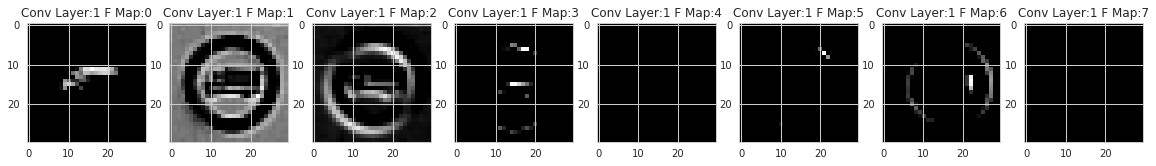

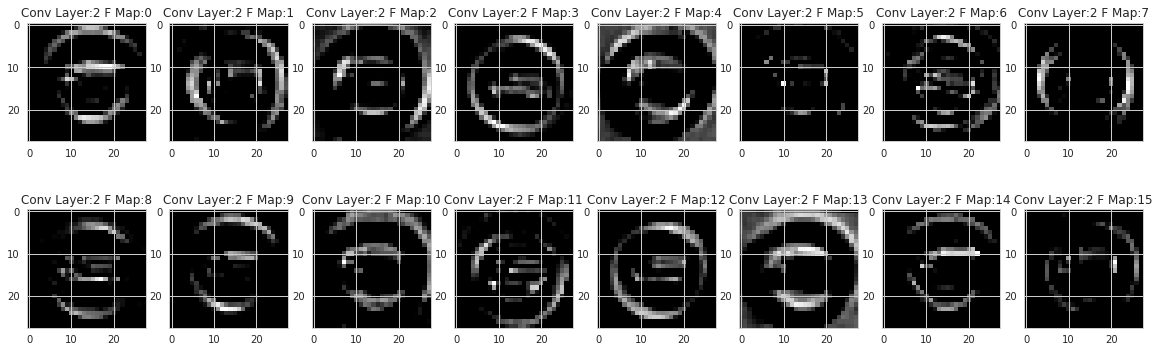

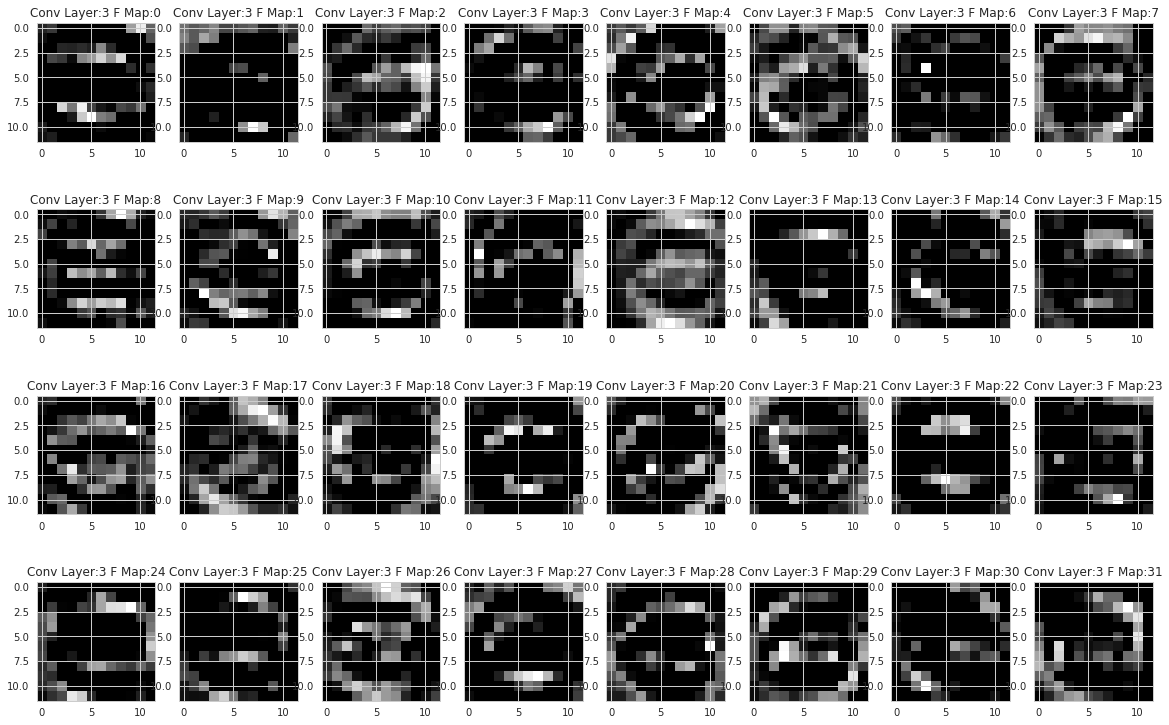

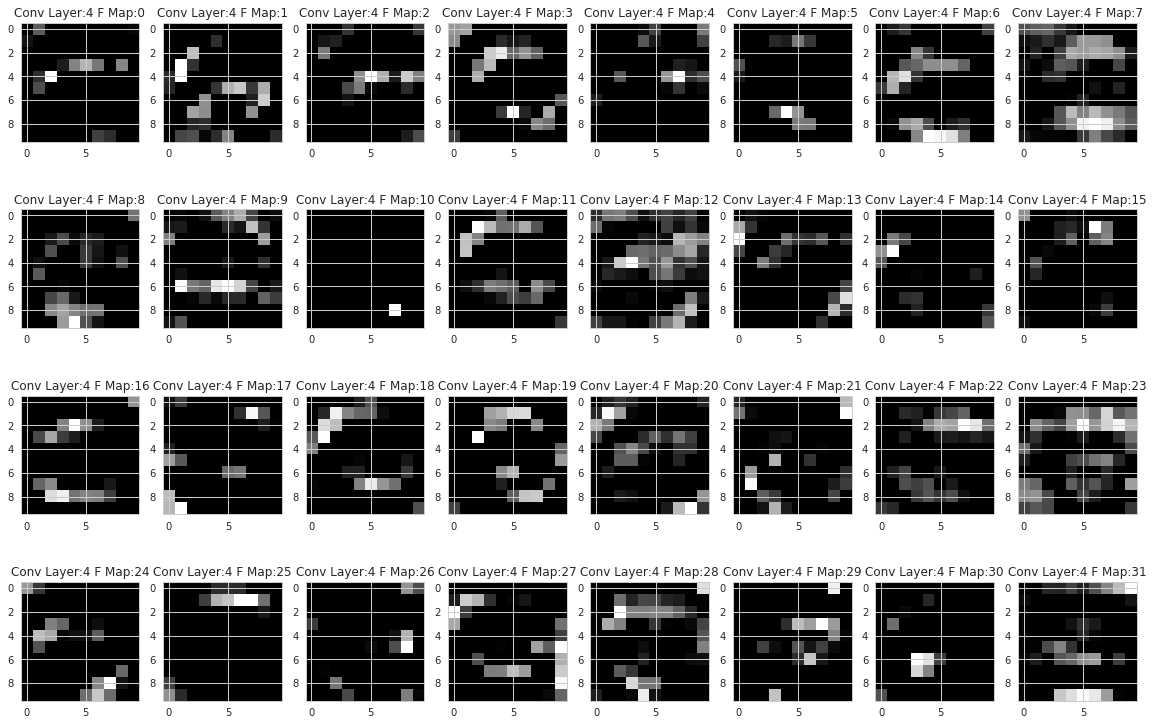

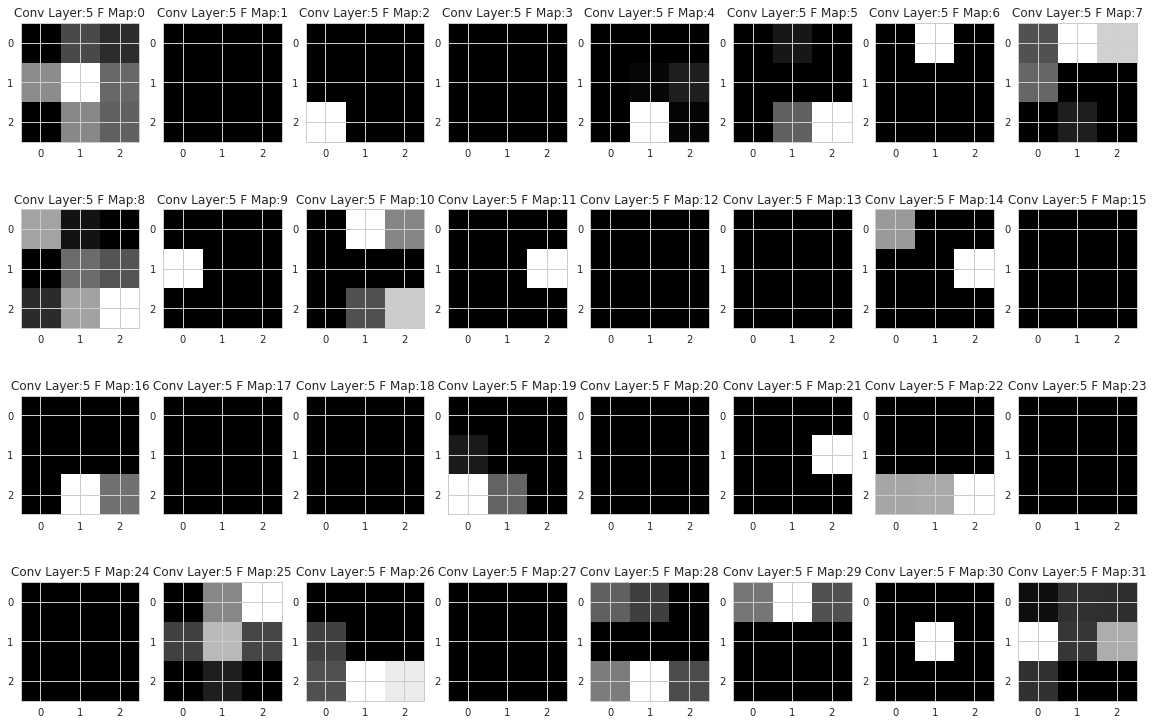

In [19]:
convLayer = ["Conv1:0","Conv2:0","Conv3:0","Conv4:0","Conv5:0"]
with tf.Session() as sess:
    saver.restore(sess, 'data/model.ckpt')
    i = 1
    for convName in convLayer:
        Conv1 = tf.get_default_graph().get_tensor_by_name(convName)
        outputFeatureMap(X_test[0:1], Conv1, plt_num = i)
        
        i = i + 1
    #print('Test Accuracy on saved Model is %s', test_accuracY_saved_Model)